In [1]:
%matplotlib notebook
from EIANN_utils import *
import matplotlib.pyplot as plt

In [2]:
input_size = 7
dataset = n_hot_patterns(n=2,length=input_size)
target = torch.eye(dataset.shape[0])

epochs=300

In [3]:
def test_EIANN_config(layer_config, projection_config, hyperparameter_kwargs, epochs):
    
    network = FBI_RNN(layer_config, projection_config, **hyperparameter_kwargs)
    
    for sample in dataset:
        network.forward(sample, store_history=True)

    plt.figure()
    plt.imshow(network.layers['Output'].populations['E'].projections['Input']['E'].weight.data)
    plt.colorbar()
    plt.xlabel('Input unit ID')
    plt.ylabel('Output unit ID')
    plt.title('Initial weights\nOutput_E <- Input_E')

    plt.figure()
    plt.imshow(network.layers['Output'].populations['E'].activity_history[-dataset.shape[0]:,-1,:].T)
    plt.colorbar()
    plt.xlabel('Input pattern ID')
    plt.ylabel('Output unit ID')
    plt.title('Initial activity\nOutput_E')

    plt.figure()
    plt.imshow(torch.mean(network.layers['Output'].populations['E'].activity_history[-dataset.shape[0]:,:,:], axis=0).T)
    plt.colorbar()
    plt.xlabel('Equilibration time steps')
    plt.ylabel('Output unit ID')
    plt.title('Mean activity dynamics\nOutput_E')

    for i, layer in enumerate(network.layers.values()):
        if i >0:
            for population in layer.populations.values():
                print(layer.name, population.name, population.bias)

    network.reset_history()

    network.train(dataset, target, epochs, store_history=True, shuffle=True, status_bar=True)

    plt.figure()
    plt.plot(network.loss_history)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Training loss')

    plt.figure()
    plt.imshow(network.layers['Output'].populations['E'].projections['Input']['E'].weight.data)
    plt.colorbar()
    plt.xlabel('Input unit ID')
    plt.ylabel('Output unit ID')
    plt.title('Final weights\nOutput_E <- Input_E')

    plt.figure()
    plt.imshow(network.layers['Output'].populations['E'].activity_history[network.sorted_sample_indexes,-1,:][-dataset.shape[0]:,:].T)
    plt.colorbar()
    plt.xlabel('Input pattern ID')
    plt.ylabel('Output unit ID')
    plt.title('Final activity\nOutput_E')

    plt.figure()
    plt.imshow(torch.mean(network.layers['Output'].populations['E'].activity_history[-dataset.shape[0]:,:,:], axis=0).T)
    plt.colorbar()
    plt.xlabel('Equilibration time steps')
    plt.ylabel('Output unit ID')
    plt.title('Mean activity dynamics\nOutput_E')

    for i, layer in enumerate(network.layers.values()):
        if i >0:
            for population in layer.populations.values():
                print(layer.name, population.name, population.bias)

Backprop w/inhibition (softplus)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}, 
                            'include_bias': False
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'softplus', 
                            'activation_kwargs': 
                                {'beta': 4.}, 
                            'include_bias': False
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'FF', 
                                         'learning_rule': 'backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-3.838023E+00,), 
                                         'direction': 'FB', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'FF', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 10,
                         'learning_rate': 2.999993E+00,
                         'seed': 42
                        }

test_EIANN_config(layer_config, projection_config, hyperparameter_kwargs, epochs)

Backprop w/inhibition (relu)

In [ ]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu', 
                            'include_bias': False
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu', 
                            'include_bias': False
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'FF', 
                                         'learning_rule': 'backprop'
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-5.864659E-01,), 
                                         'direction': 'FB', 
                                         'learning_rule': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'FF', 
                                         'learning_rule': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 10,
                         'learning_rate': 2.882704E+00,
                         'seed': 42
                        }

test_EIANN_config(layer_config, projection_config, hyperparameter_kwargs, epochs)

Oja's rule w/inhibition:

<IPython.core.display.Javascript object>


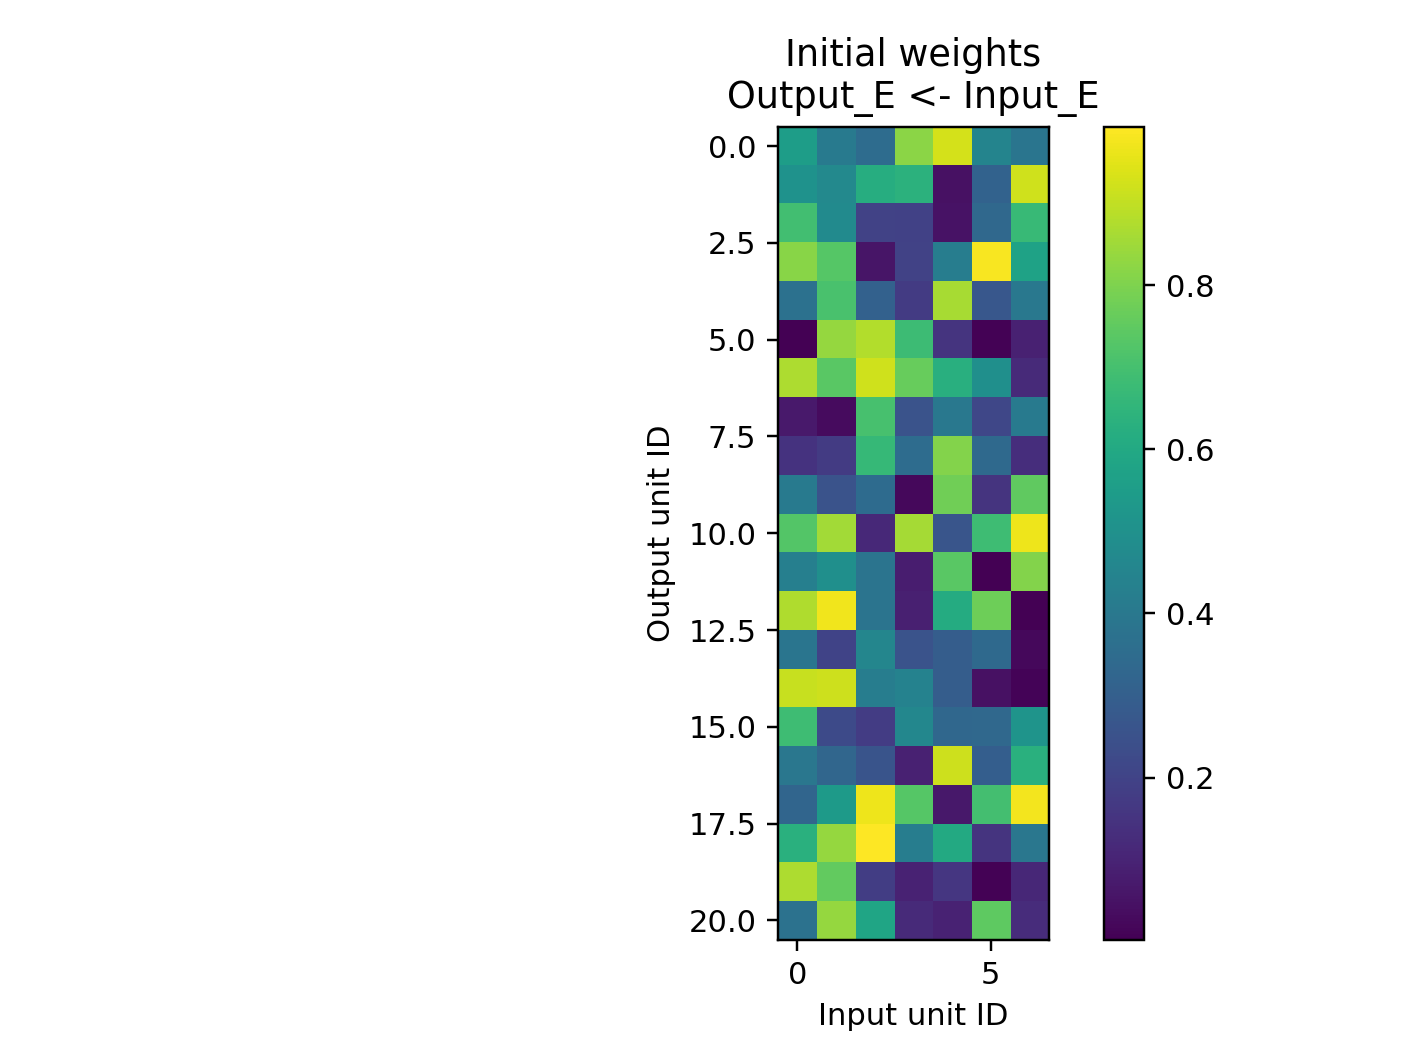

<IPython.core.display.Javascript object>


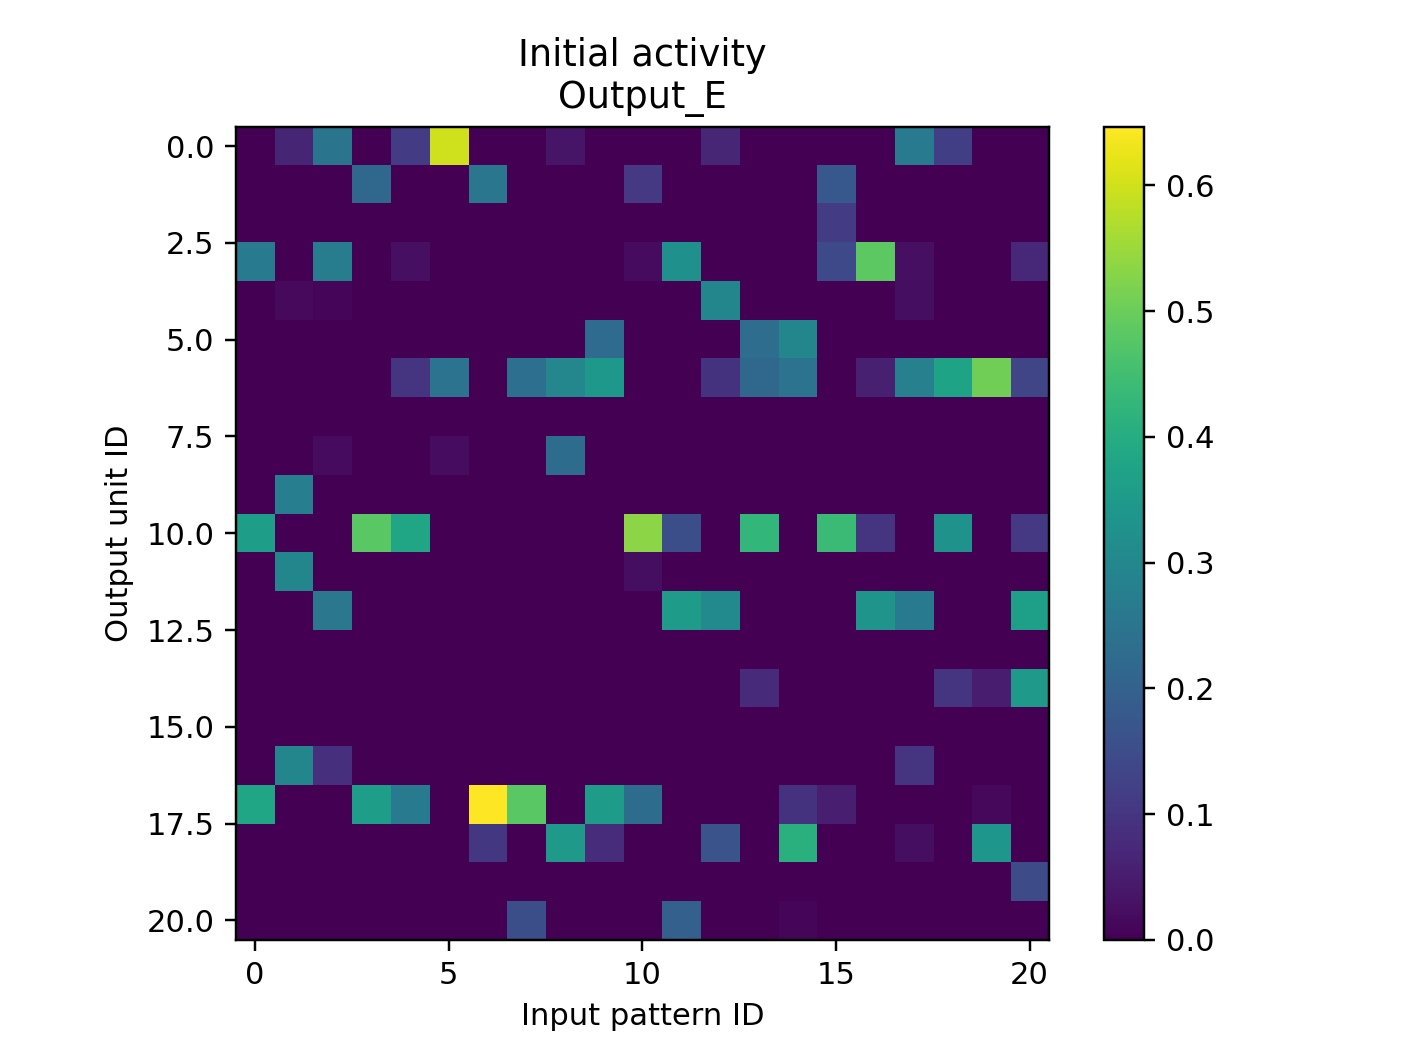

<IPython.core.display.Javascript object>


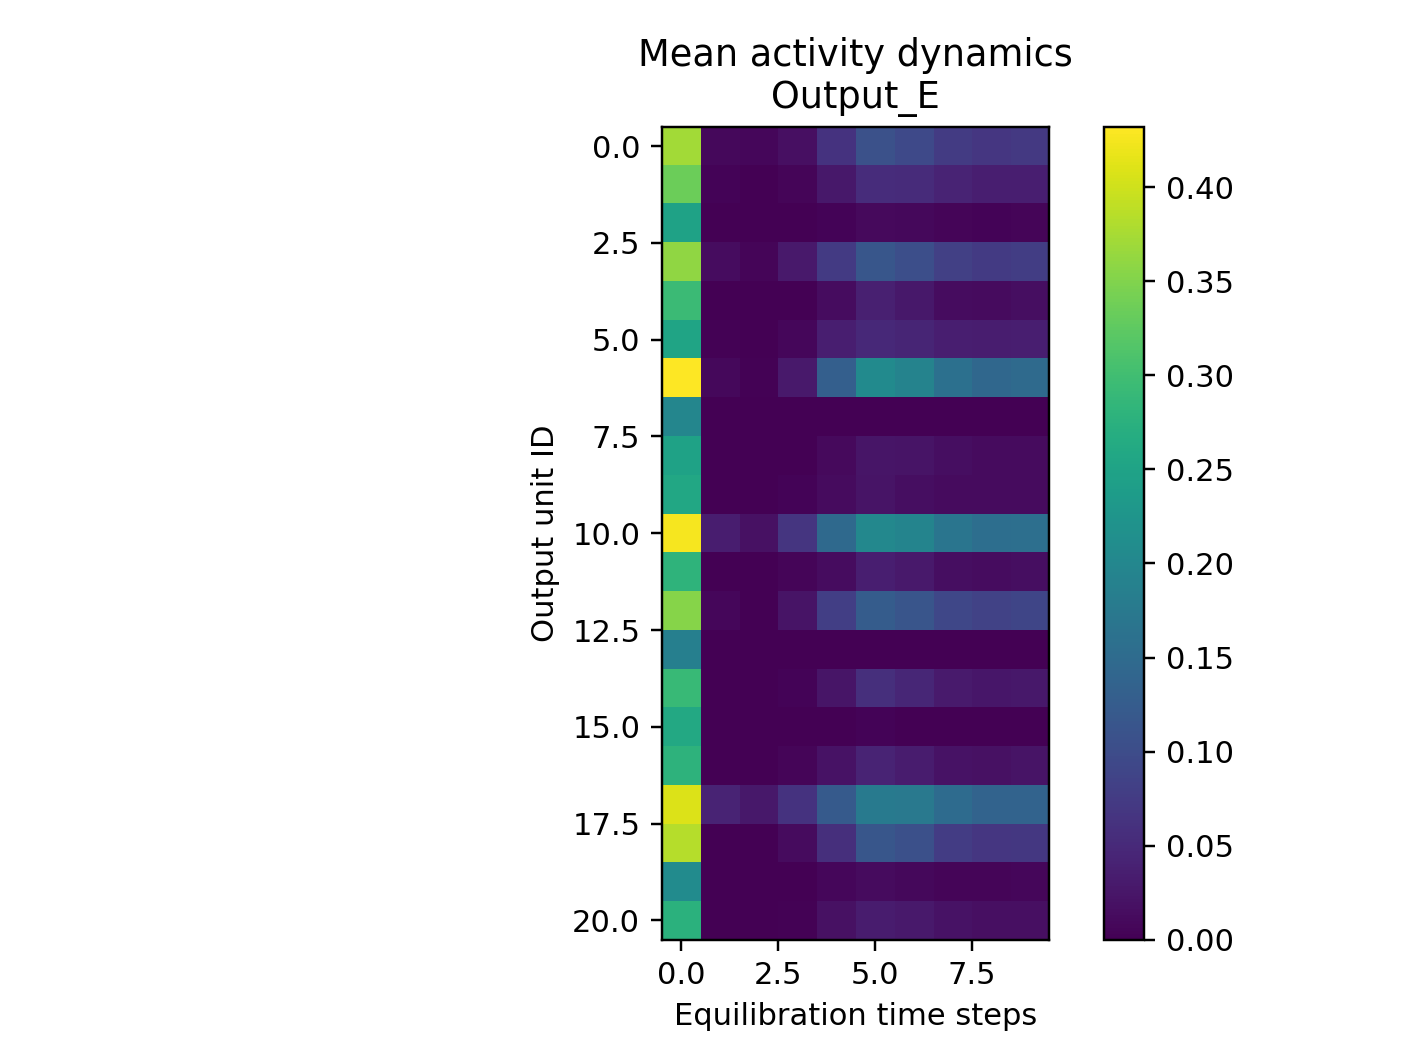

Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


100%|██████████| 300/300 [00:13<00:00, 22.91it/s]


<IPython.core.display.Javascript object>


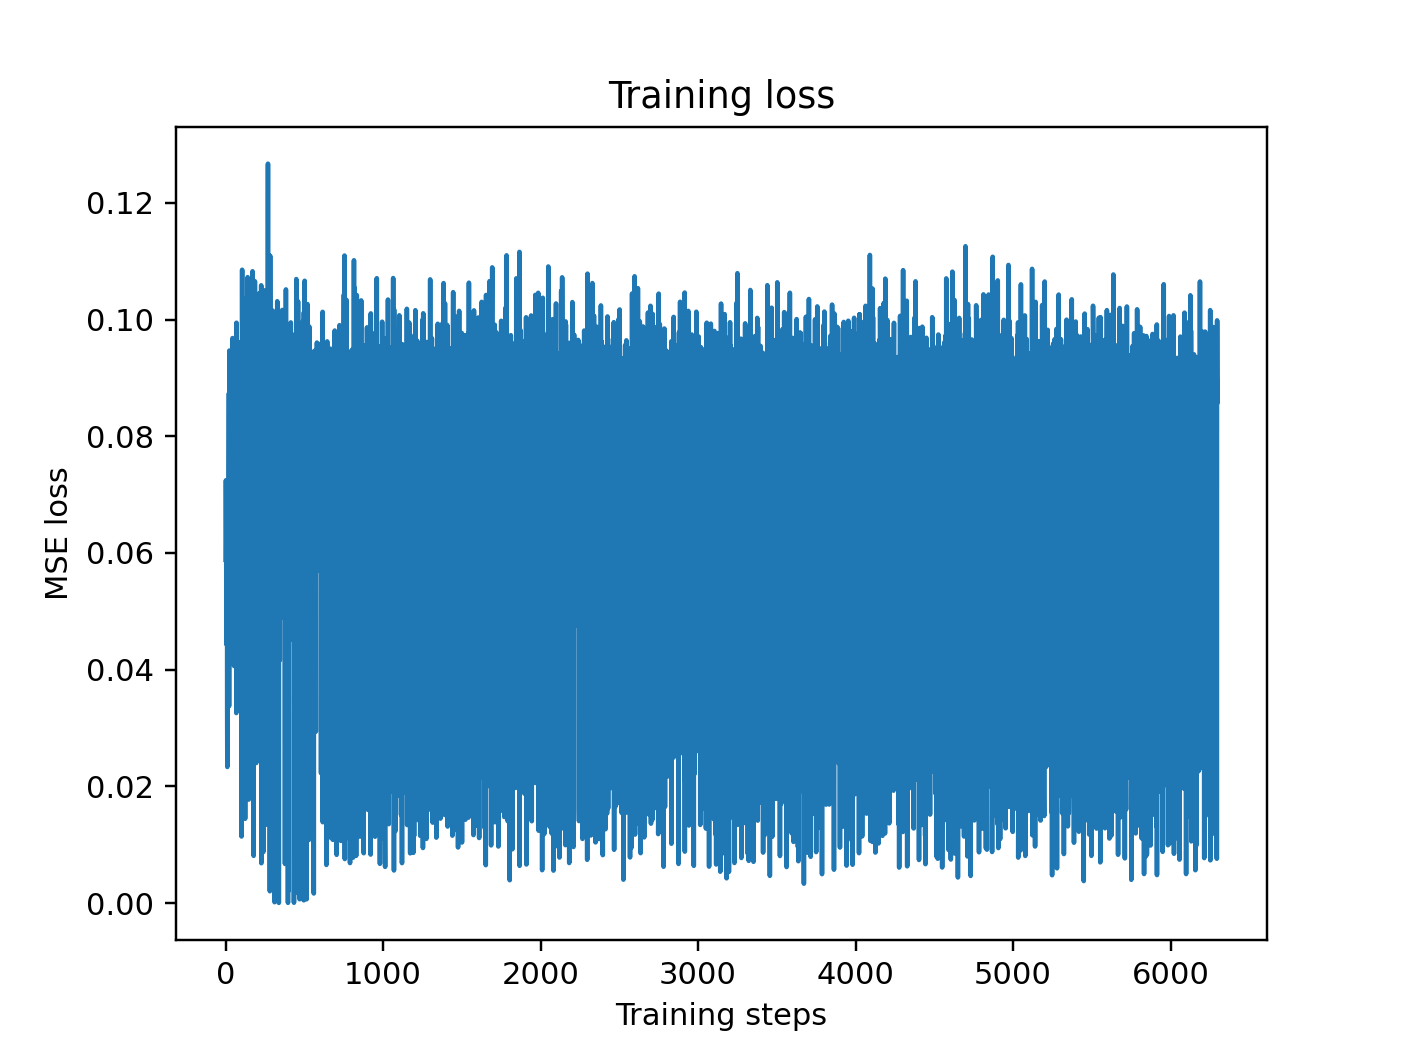

<IPython.core.display.Javascript object>


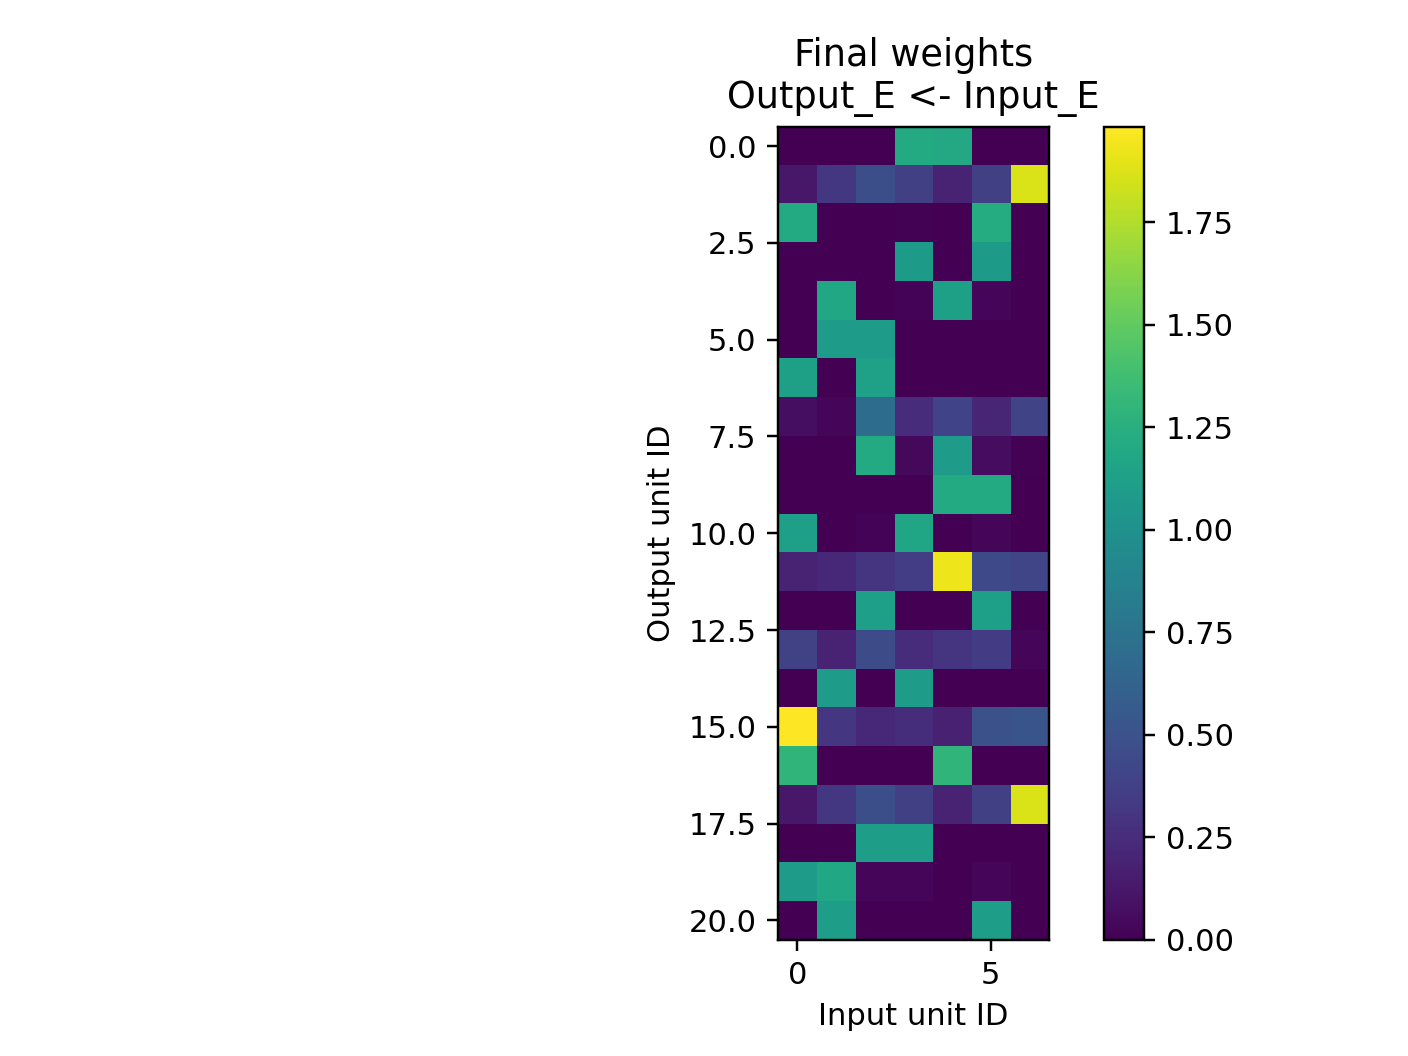

<IPython.core.display.Javascript object>


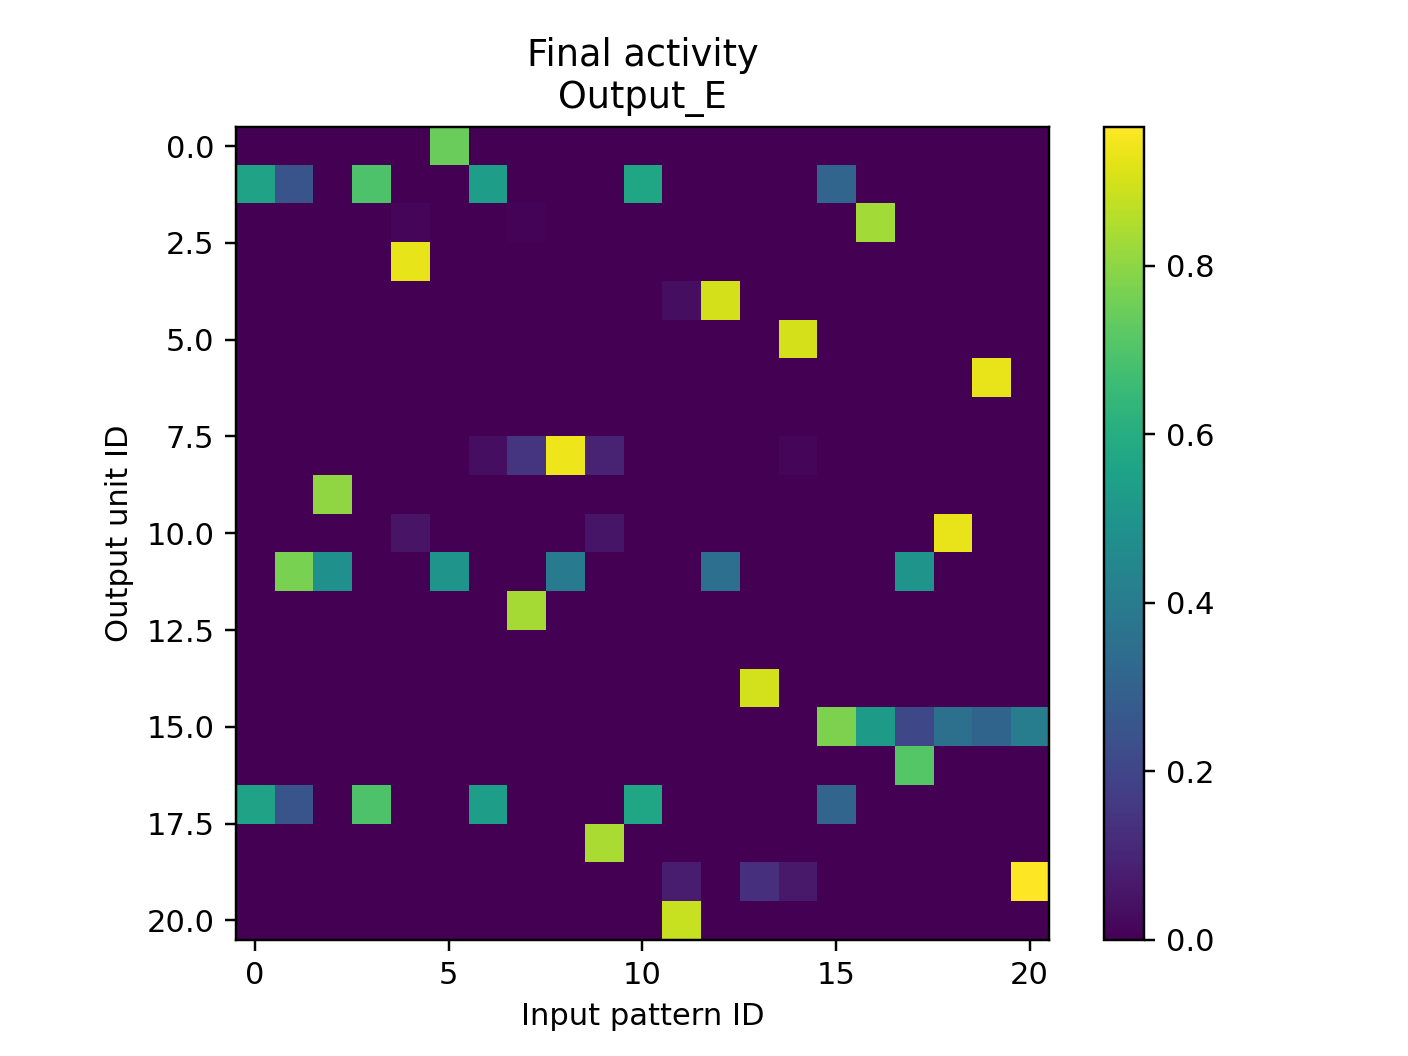

<IPython.core.display.Javascript object>


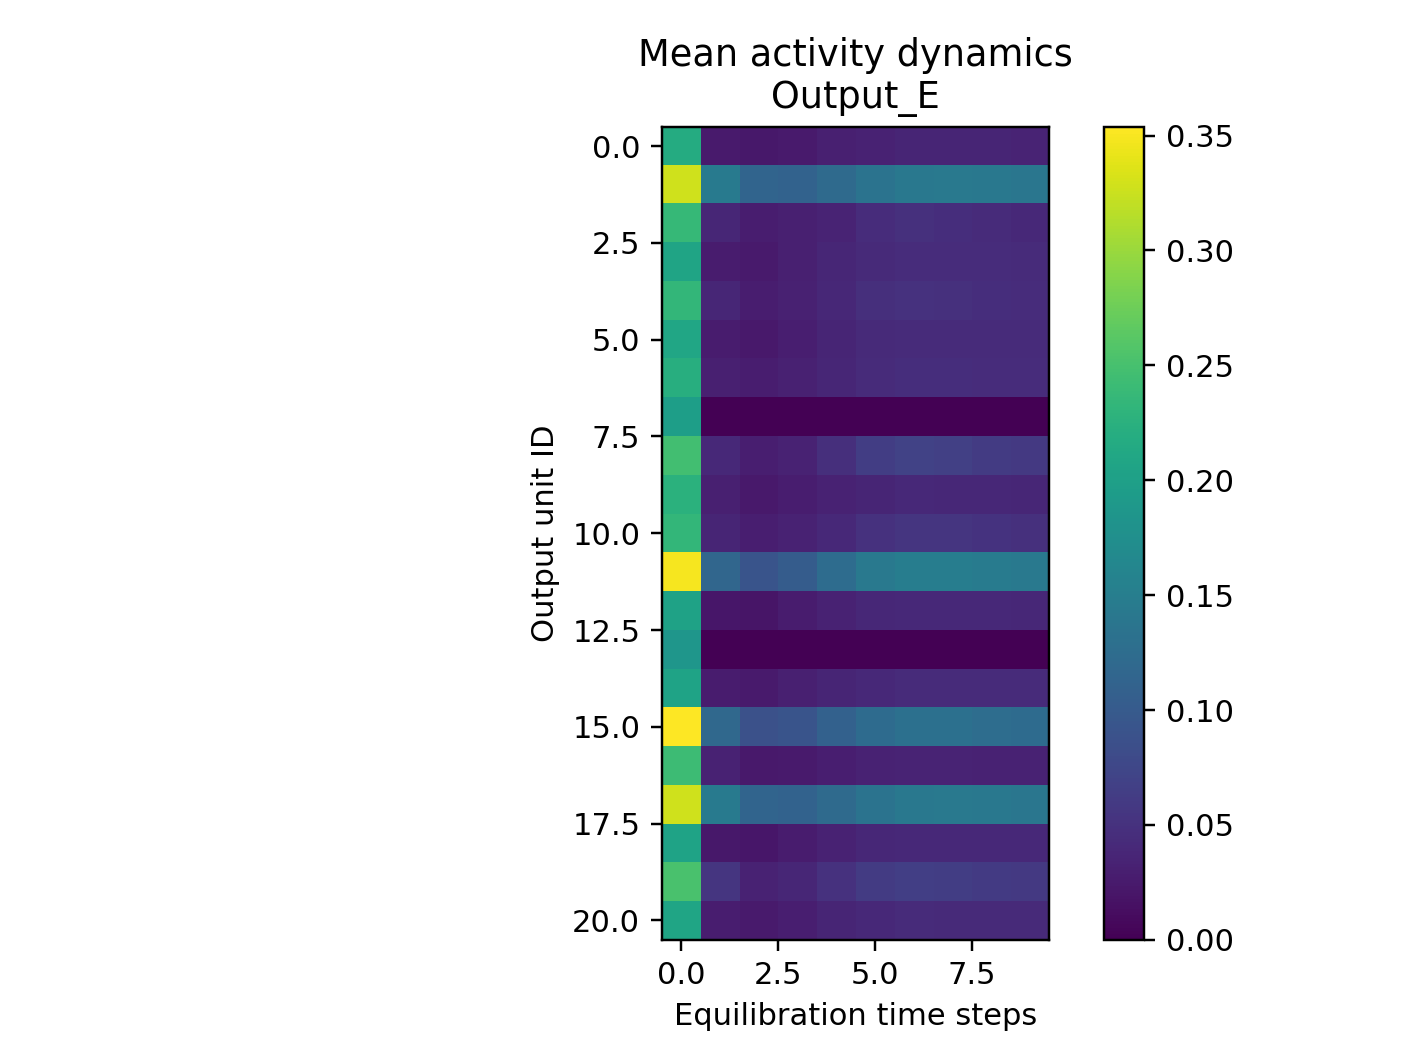

Output E tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI tensor([0.])


In [4]:
layer_config = {'Input': 
                      {'E': 
                           {'size': 7}}, 
                'Output': 
                      {'E': 
                           {'size': 21, 
                            'activation': 'relu', 
                            'include_bias': False
                           },
                       'FBI': 
                            {'size': 1, 
                            'activation': 'relu', 
                            'include_bias': False
                            }
                      }
                 }

projection_config = {'Output': 
                         {'E': 
                              {'Input': 
                                   {'E': 
                                        {'weight_init': 'uniform_', 
                                         'weight_init_args': (0, 1), 
                                         'weight_bounds': (0, None), 
                                         'direction': 'FF', 
                                         'learning_rule': 'oja',
                                         'backward': None
                                        }
                                   }, 
                               'Output': 
                                   {'FBI': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (-1.231289E+00,), 
                                         'direction': 'FB', 
                                         'learning_rule': None,
                                         'backward': None
                                        }
                                   }
                              },
                          'FBI': 
                              {'Output': 
                                   {'E': 
                                        {'weight_init': 'fill_', 
                                         'weight_init_args': (1,), 
                                         'direction': 'FF', 
                                         'learning_rule': None,
                                         'backward': None
                                        }
                                   }
                              }
                         }
                    }

hyperparameter_kwargs = {'tau': 3,
                         'forward_steps': 10,
                         'backward_steps': 0,
                         'learning_rate': 6.761169E-01,
                         'seed': 42
                        }

test_EIANN_config(layer_config, projection_config, hyperparameter_kwargs, epochs)